In [2]:
# CPSC 424 Assignment 5 Question 1
#
# Script that tests the subdivide function.
#
# Your task for this question is to implement subdivide().

In [1]:
# Include packages
using Plots
using LinearAlgebra
using SymPy

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242


┌ Info: Precompiling SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
└ @ Base loading.jl:1242


In [2]:
# ====================================================
# function [x, y] = subdivide(xcoords, ycoords, niters, scheme, move2limit)
#
# This function subdivides the given control polygon `niters` times according to 
# the requested subdivision scheme.  Finally, each point is moved to
# the limit curve using Eigen-analysis.
#
# xcoords and ycoords are the x- and y-coordinates of the control points.
# niters is the number of subdivision iterations to perform.
# scheme specifies the scheme to use:
#   if scheme == 1, use the 1/8 1/8 3/4 (Cubic) subdivision scheme
#   if scheme == 2, use the 1/7 1/7 5/7 subdivision scheme
# move2limit specifies whether the points should be moved to their
#            limit positions after subdivision.
function subdivide(xcoords, ycoords, niters, scheme, move2limit)
    # YOUR IMPLEMENTATION GOES HERE
    fxcoordinates =[]
    fycoordinates =[]
    matrix = I
    nvector = I
    if(scheme == 1)
        matrix = ([[0.5 0.5 0];[0.125 0.75 0.125];[0 0.5 0.5]])
        nvector = [(1/6) (2/3) (1/6)]
    else
        matrix = ([[0.5 0.5 0];[(1/7) (5/7) (1/7)];[0 0.5 0.5]])
        nvector = [(2/11) (7/11) (2/11)]
    end

    for k in 1:(niters)
        fycoordinates = []
        fxcoordinates = []
        for i in 1:length(xcoords)

            if(i == 1)
                xvector = [xcoords[end] xcoords[i] xcoords[i+1]]
                yvector = [ycoords[end] ycoords[i] ycoords[i+1]]
            elseif(i == length(xcoords))
                xvector = [xcoords[i-1] xcoords[i] xcoords[1]]
                yvector = [ycoords[i-1] ycoords[i] ycoords[1]]

            else
                xvector = [xcoords[i-1] xcoords[i] xcoords[i+1]]
                yvector = [ycoords[i-1] ycoords[i] ycoords[i+1]]
            end

            push!(fxcoordinates,dot(matrix[2,:], xvector))
            push!(fycoordinates,dot(matrix[2,:], yvector))
            push!(fxcoordinates,dot(matrix[3,:], xvector))
            push!(fycoordinates,dot(matrix[3,:], yvector))

        end

        xcoords =fxcoordinates
        ycoords = fycoordinates

    end

    if(move2limit == 1)
        nmatrix = matrix^100
        mx = []
        my = []
        for i in 1:length(xcoords)
            if(i == 1)
                xvector = [xcoords[end] xcoords[i] xcoords[i+1]]
                yvector = [ycoords[end] ycoords[i] ycoords[i+1]]
            elseif(i == length(xcoords))
                xvector = [xcoords[i-1] xcoords[i] xcoords[1]]
                yvector = [ycoords[i-1] ycoords[i] ycoords[1]]

            else
                xvector = [xcoords[i-1] xcoords[i] xcoords[i+1]]
                yvector = [ycoords[i-1] ycoords[i] ycoords[i+1]]
            end
            push!(mx,dot(nvector, xvector))
            push!(my,dot(nvector, yvector))

        end
        xcoords =mx
        ycoords =my
    end

    return xcoords,ycoords
end

   

subdivide (generic function with 1 method)

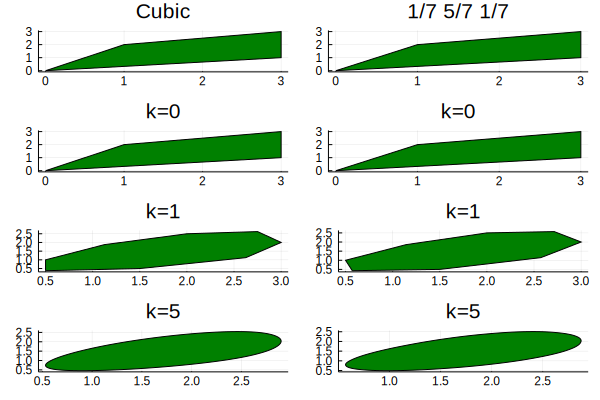

In [3]:
# ====================================================
#                Polygon 1
# ====================================================


# ================= set the control points
x1 = [0, 1, 3, 3]
y1 = [0, 2, 3, 1]

# ================= Draw scheme 1
p1 = plot(Shape(x1, y1), color = :green, title="Cubic")

x, y = subdivide(x1, y1, 0, 1, 0)
p2 = plot(Shape(x, y), color = :green, title="k=0")

x, y = subdivide(x1, y1, 1, 1, 0)
p3 = plot(Shape(x, y), color = :green, title="k=1")

x, y = subdivide(x1, y1, 5, 1, 0)
p4 = plot(Shape(x, y), color = :green, title="k=5")

# ================= Draw scheme 2
p5 = plot(Shape(x1, y1), color = :green, title="1/7 5/7 1/7")

x, y = subdivide(x1, y1, 0, 2, 0)
p6 = plot(Shape(x, y), color = :green, title="k=0")

x, y = subdivide(x1, y1, 1, 2, 0)
p7 = plot(Shape(x, y), color = :green, title="k=1")

x, y = subdivide(x1, y1, 5, 2, 0)
p8 = plot(Shape(x, y), color = :green, title="k=5")


plot(p1,p5,p2,p6,p3,p7,p4,p8,layout=(4,2),legend=false)

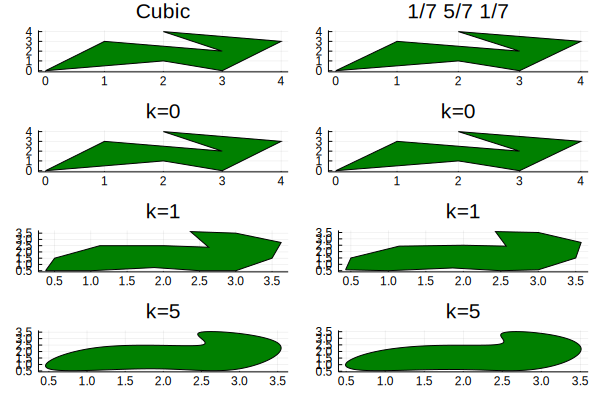

In [4]:
# ====================================================
#                Polygon 2
# ====================================================


# ================= set the control points

x1 = [0, 1, 3, 2, 4, 3, 2]
y1 = [0, 3, 2, 4, 3, 0, 1]

# ================= Draw scheme 1
p1 = plot(Shape(x1, y1), color = :green, title="Cubic")

x, y = subdivide(x1, y1, 0, 1, 0)
p2 = plot(Shape(x, y), color = :green, title="k=0")

x, y = subdivide(x1, y1, 1, 1, 0)
p3 = plot(Shape(x, y), color = :green, title="k=1")

x, y = subdivide(x1, y1, 5, 1, 0)
p4 = plot(Shape(x, y), color = :green, title="k=5")

# ================= Draw scheme 2
p5 = plot(Shape(x1, y1), color = :green, title="1/7 5/7 1/7")

x, y = subdivide(x1, y1, 0, 2, 0)
p6 = plot(Shape(x, y), color = :green, title="k=0")

x, y = subdivide(x1, y1, 1, 2, 0)
p7 = plot(Shape(x, y), color = :green, title="k=1")

x, y = subdivide(x1, y1, 5, 2, 0)
p8 = plot(Shape(x, y), color = :green, title="k=5")


plot(p1,p5,p2,p6,p3,p7,p4,p8,layout=(4,2),legend=false)